# 손글씨 분류기 
0. import 
1. 데이터 준비
2. 데이터 전처리
3. 모델 만들기(네트워크 설계하기)
4. 훈련
5. 평가하기
6. 성능 개선하기


## 1. 데이터 준비하기
- tensorflow 의 표준 API 인 Sequentail API 를 이용하에 손글씨 인식기 만든다.
- tensorflow 는 구글에서 오픈 소스로 제공하는 가장 널리 상요하고 있는 머신러닝 라이브러리 중 하나이다.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

# Tensorflow 버전 출력하기
print(tf.__version__)

mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()



2.8.0


## 2. 데이터 전처리, 데이터 확인하기

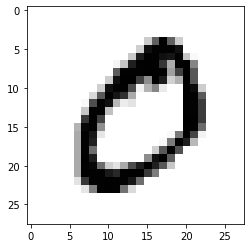

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[1])

0


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


- 60,000 개의 train data
- 10,000 개의 test data 

In [ ]:
# 손글씨 픽셀값은 0 ~ 255 사이의 값을 가진다
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
# 픽셀값이 0 으로 갈수록 검은색 255 로 갈수록 밝은색이 나타난다.

최소값: 0  최대값: 255


In [ ]:
# 최소값이 0, 최대값이 1로 나오도록 시키자
x_train_norm, x_test_norm = x_train/255, x_test/255
print('최소값:',np.min(x_train_norm),'최대값:',np.max(x_test_norm))

최소값: 0.0 최대값: 1.0


## 3. 네트워크 설계하기
- tf.keras 에서 Sequentail API 방법을 사용한다
- 개발의 자유도는 떨어지지만 매우 간단하게 딥러닝 모델을 만들 수 있는 방법이다

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

print("Model에 추가된 layer 수:", len(model.layers))

Model에 추가된 layer 수: 7


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

## 4. 딥러닝 네트워크 학습시키기

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [ ]:
# 조기종료 항목 추가
# earlystopping


In [ ]:
# 딥러닝 학습시키고 학습 설정하기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1915 - accuracy: 0.9422
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0270 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.011

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


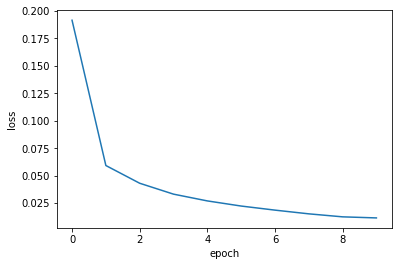

In [ ]:
# 그래프로 한번 표현해보기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
         

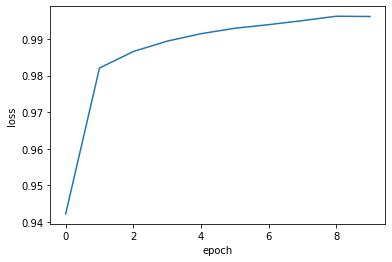

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
         

##5. 평가하기

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0344 - accuracy: 0.9907


-  test data 로 accuracy 를 계산하였을때 0.9881 이 나왔다
- test data 10000개 중에 몇개가 틀렸는지 궁금하다 : 119개

model.predict() 결과 :  [1.11695250e-10 1.02796235e-11 2.89116664e-09 2.18204335e-08
 6.46014769e-11 7.70673303e-09 1.50431357e-15 1.00000000e+00
 7.09064682e-11 8.63356941e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


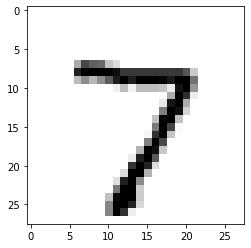

model.predict() 결과 :  [3.4885832e-09 4.6568594e-08 1.0000000e+00 2.8228053e-15 2.0074802e-15
 6.7410288e-19 3.6543529e-12 2.2384042e-15 1.0461678e-11 2.6409267e-16]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


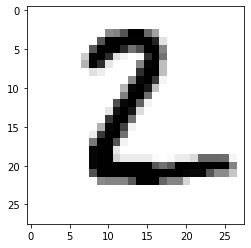

model.predict() 결과 :  [5.2846678e-07 9.9998975e-01 4.2701959e-07 2.7114554e-11 3.4778100e-06
 3.2845935e-07 6.5976690e-07 9.0606329e-07 3.8916578e-06 1.2259093e-08]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


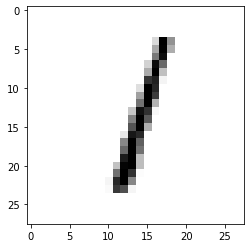

model.predict() 결과 :  [1.0000000e+00 1.2338322e-15 7.8895002e-11 7.3618603e-12 1.9198894e-11
 8.3602480e-10 2.0689178e-08 2.1371509e-08 5.9539221e-11 4.9579265e-09]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


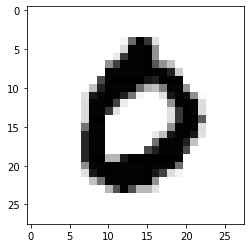

model.predict() 결과 :  [1.8612462e-12 3.6148805e-12 9.1342246e-12 3.6069289e-14 9.9997735e-01
 4.2670850e-13 3.1986311e-13 9.0226582e-09 1.4557920e-10 2.2705632e-05]
model이 추론한 가장 가능성이 높은 결과 :  4
실제 데이터의 라벨 :  4


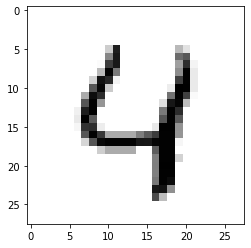

model.predict() 결과 :  [1.5491449e-07 9.9999881e-01 3.5266208e-08 1.7090313e-13 3.2811336e-08
 3.3396143e-11 1.2683763e-09 1.0008115e-06 3.7890580e-08 1.4132929e-09]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


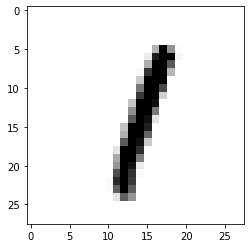

model.predict() 결과 :  [1.4090490e-15 6.8255707e-07 2.8691457e-12 1.3332125e-13 9.9996996e-01
 1.6143842e-10 1.1402224e-13 3.0965285e-08 2.8455413e-05 8.8305870e-07]
model이 추론한 가장 가능성이 높은 결과 :  4
실제 데이터의 라벨 :  4


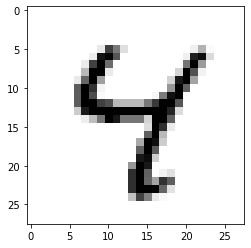

model.predict() 결과 :  [7.1496845e-13 6.2684169e-10 5.3948230e-07 1.0041640e-08 3.2486673e-06
 7.4456828e-08 2.8341981e-15 1.2624928e-09 3.0090698e-07 9.9999571e-01]
model이 추론한 가장 가능성이 높은 결과 :  9
실제 데이터의 라벨 :  9


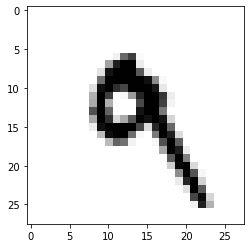

model.predict() 결과 :  [1.6984247e-10 4.5110421e-15 3.1632432e-14 2.4112216e-12 3.1394578e-11
 9.9840802e-01 1.5712831e-03 7.6664820e-17 1.9882247e-05 8.0112005e-07]
model이 추론한 가장 가능성이 높은 결과 :  5
실제 데이터의 라벨 :  5


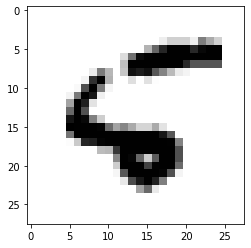

model.predict() 결과 :  [3.1009282e-12 3.4537314e-12 7.4691650e-12 7.1120575e-11 7.6897384e-04
 8.2589914e-08 1.6575712e-15 1.3030029e-04 2.9990067e-06 9.9909770e-01]
model이 추론한 가장 가능성이 높은 결과 :  9
실제 데이터의 라벨 :  9


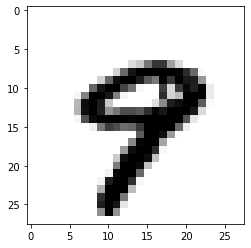

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=[0,1,2,3,4,5,6,7,8,9]  #1번째 x_test를 살펴보자.
for i in idx:
    print('model.predict() 결과 : ', predicted_result[i])
    print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[i])
    print('실제 데이터의 라벨 : ', y_test[i])
    
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    plt.show()

틀린 개수: 93
예측확률분포: [9.99978781e-01 1.17239905e-14 1.96102010e-05 6.58032251e-09
 1.89326623e-15 2.90616919e-10 3.15726993e-11 1.53315511e-06
 1.45131671e-10 1.71268546e-08]
라벨: 2, 예측결과: 0


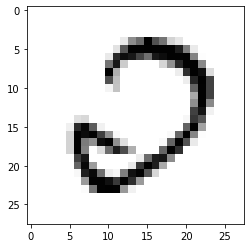

예측확률분포: [1.84038562e-13 3.48350876e-10 2.80992308e-12 9.93731320e-01
 1.05964564e-10 6.03128131e-03 7.77800256e-20 4.42516033e-08
 3.43082682e-08 2.37194530e-04]
라벨: 5, 예측결과: 3


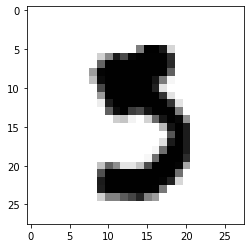

예측확률분포: [2.6693104e-07 2.5398188e-07 5.0224862e-05 8.5085416e-01 3.9961222e-11
 7.1938061e-08 2.3123459e-07 3.0989750e-10 1.4909483e-01 3.9497206e-09]
라벨: 8, 예측결과: 3


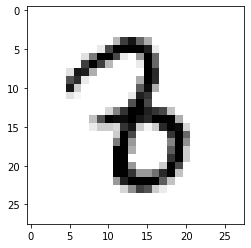

예측확률분포: [9.9969172e-01 2.1456630e-09 1.4963366e-07 5.0086833e-06 5.0541421e-10
 1.9616167e-05 3.3068839e-06 5.0153336e-11 2.7823314e-04 2.1039646e-06]
라벨: 8, 예측결과: 0


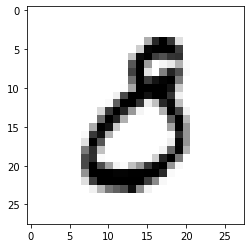

예측확률분포: [1.2144813e-03 5.4507351e-01 9.7842119e-04 2.5791829e-09 6.4435227e-07
 3.5682009e-04 4.4817075e-01 7.0332993e-09 4.2037712e-03 1.5506565e-06]
라벨: 6, 예측결과: 1


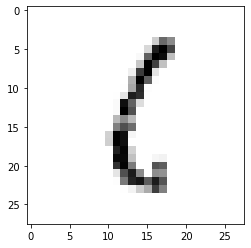

In [ ]:
# 틀린 부분 출력해서 한번 보기
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels): # 값을 무시할경우 _ 사용한다
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# 틀린 부분의 개수를 출력해보자
print('틀린 개수:', len(wrong_predict_list))

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 6. 파라미터 수정으로 성능 올리기

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_2 = model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

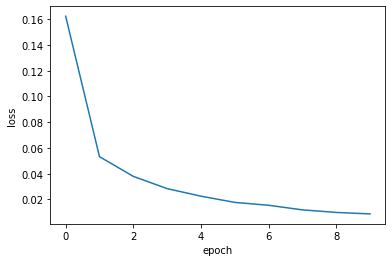

In [ ]:
plt.plot(history_2.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
         

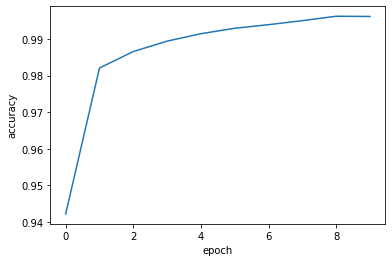

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
         

-   이미지 특징 수를 (32,64) 로 증가시켯더니 test accuracy 가 증가하였다.

틀린 개수: 93
예측확률분포: [6.7660505e-01 1.3232203e-12 5.2138969e-09 3.4704200e-07 5.0757853e-10
 1.4504095e-05 3.0957717e-01 1.4733620e-13 1.3802542e-02 4.5586151e-07]
라벨: 6, 예측결과: 0


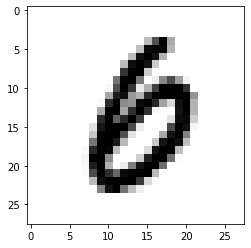

예측확률분포: [2.6693104e-07 2.5398188e-07 5.0224862e-05 8.5085416e-01 3.9961222e-11
 7.1938061e-08 2.3123459e-07 3.0989750e-10 1.4909483e-01 3.9497206e-09]
라벨: 8, 예측결과: 3


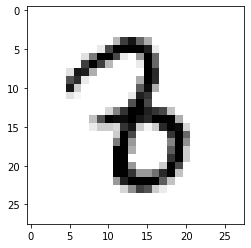

예측확률분포: [1.6744252e-07 1.1073158e-12 1.3302246e-08 6.0811495e-12 9.9888784e-01
 1.8894392e-04 1.3829207e-06 3.8334267e-05 1.9912887e-09 8.8323280e-04]
라벨: 6, 예측결과: 4


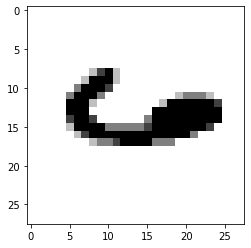

예측확률분포: [2.4788051e-06 3.7394302e-06 1.7093888e-07 2.7007758e-07 4.8807436e-01
 5.7207711e-07 5.5532183e-07 1.3292595e-06 1.8147912e-05 5.1189840e-01]
라벨: 4, 예측결과: 9


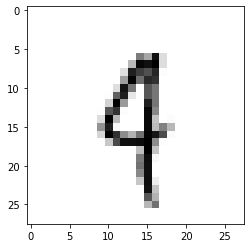

예측확률분포: [5.8327641e-06 1.2756008e-02 5.2895652e-05 1.0684314e-03 4.7221379e-03
 3.8996468e-06 5.2465771e-10 9.7126108e-01 9.2354512e-06 1.0120564e-02]
라벨: 9, 예측결과: 7


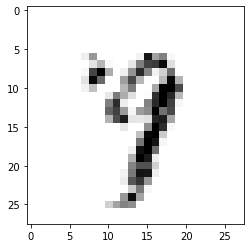

In [ ]:
# 틀린 부분 출력해서 한번 보기
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels): # 값을 무시할경우 _ 사용한다
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# 틀린 부분의 개수를 출력해보자
print('틀린 개수:', len(wrong_predict_list))

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

- 성능을 향상시킨후 틀랜 개수 119개 에서 102개로 줄었다.
- 성능을 올리고 

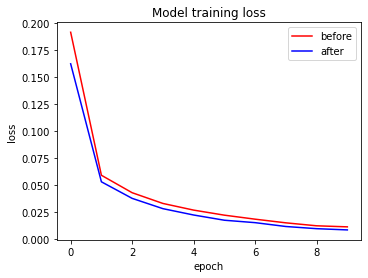

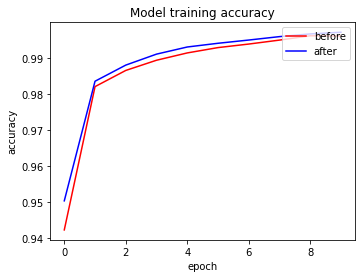

In [ ]:
## 비교
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r')
plt.plot(history_2.history['loss'],'b')
plt.title('Model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['before','after'], loc='upper right')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r')
plt.plot(history_2.history['accuracy'],'b')
plt.title('Model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['before','after'], loc='upper right')
plt.show()